In [1]:
import pandas as pd
import numpy as np
import sqlite3
import json
import matplotlib.pyplot as plt

In [36]:
EXPERIMENT_DIR = '/Users/darylwilding-mcbride/Downloads/experiments/YHE-R'
RESULTS_DB_NAME = '{}/summarised-results/results.sqlite'.format(EXPERIMENT_DIR)
db_conn = sqlite3.connect(RESULTS_DB_NAME)
results_df = pd.read_sql_query("select * from sequences", db_conn)
db_conn.close()

In [37]:
len(results_df)

29553

In [38]:
results_df.sample(n=5)

,sequence,charge,human,identifications,extractions
13832,LALHSGMDYAIMTGGDVAPMGR,2,1,"{""perc_q_value"": 2.9439299e-06, ""run_names"": [...","[{""run_name"": ""YHE114_11_Slot1-1_1_3043"", ""pro..."
17982,NATGALLNMTHSEENRK,2,0,"{""perc_q_value"": 2.9439299e-06, ""run_names"": [...","[{""run_name"": ""YHE114_04_Slot1-1_1_3011"", ""pro..."
24440,TFRPAAMLIER,2,1,"{""perc_q_value"": 0.005894769100000001, ""run_na...","[{""run_name"": ""YHE114_11_Slot1-1_1_3043"", ""pro..."
9414,GGILAIASLIGVEGGNATR,2,1,"{""perc_q_value"": 2.9439299e-06, ""run_names"": [...","[{""run_name"": ""YHE114_11_Slot1-1_1_3043"", ""pro..."
9202,GEPEPMEVEEGELEIVPVR,2,1,"{""perc_q_value"": 0.0009560662699999999, ""run_n...","[{""run_name"": ""YHE114_11_Slot1-1_1_3043"", ""pro..."


In [39]:
results_df['identifications_d'] = results_df.apply(lambda row: json.loads(row.identifications), axis=1)
results_df['id_perc_q_value'] = results_df.apply(lambda row: row.identifications_d['perc_q_value'], axis=1)
results_df['id_count_all_runs'] = results_df.apply(lambda row: len(row.identifications_d['run_names']), axis=1)
results_df['id_count_human_only_runs'] = results_df.apply(lambda row: sum('YHE010' in s for s in row.identifications_d['run_names']), axis=1)

In [40]:
results_df.sample(n=3)

,sequence,charge,human,identifications,extractions,identifications_d,id_perc_q_value,id_count_all_runs,id_count_human_only_runs
16066,LQGEVVAFDYQSK,2,1,"{""perc_q_value"": 2.9439299e-06, ""run_names"": [...","[{""run_name"": ""YHE114_11_Slot1-1_1_3043"", ""pro...","{'perc_q_value': 2.9439299e-06, 'run_names': [...",0.000003,15,7
8692,FVQCPDGELQK,2,1,"{""perc_q_value"": 2.9439299e-06, ""run_names"": [...","[{""run_name"": ""YHE114_11_Slot1-1_1_3043"", ""pro...","{'perc_q_value': 2.9439299e-06, 'run_names': [...",0.000003,1,0
9155,GEGILPDGGEYKPPSDSLK,2,1,"{""perc_q_value"": 0.009097390300000001, ""run_na...","[{""run_name"": ""YHE114_11_Slot1-1_1_3043"", ""pro...","{'perc_q_value': 0.009097390300000001, 'run_na...",0.009097,1,1


In [42]:
# number of human peptides identified
len(results_df[results_df.human == True])

24193

In [44]:
# number of human peptides that couldn't be extracted in any runs
len(results_df[(results_df.human == True) & (results_df.extractions.isnull())])

292

In [45]:
results_df = results_df[results_df.extractions.notnull()].copy()

In [46]:
results_df['extractions_l'] = results_df.apply(lambda row: json.loads(row.extractions), axis=1)

In [47]:
results_df.sample(n=5)

,sequence,charge,human,identifications,extractions,identifications_d,id_perc_q_value,id_count_all_runs,id_count_human_only_runs,extractions_l
10244,GSIFVVFDSIESAK,2,1,"{""perc_q_value"": 2.9439299e-06, ""run_names"": [...","[{""run_name"": ""YHE114_11_Slot1-1_1_3043"", ""pro...","{'perc_q_value': 2.9439299e-06, 'run_names': [...",0.000003,31,10,"[{'run_name': 'YHE114_11_Slot1-1_1_3043', 'pro..."
8664,FVINYDYPNSSEDYIHR,2,1,"{""perc_q_value"": 2.9439299e-06, ""run_names"": [...","[{""run_name"": ""YHE114_11_Slot1-1_1_3043"", ""pro...","{'perc_q_value': 2.9439299e-06, 'run_names': [...",0.000003,28,9,"[{'run_name': 'YHE114_11_Slot1-1_1_3043', 'pro..."
17825,M[15.9949]LPVDEFLPVMFDK,2,1,"{""perc_q_value"": 0.00043070090999999995, ""run_...","[{""run_name"": ""YHE114_11_Slot1-1_1_3043"", ""pro...","{'perc_q_value': 0.00043070090999999995, 'run_...",0.000431,2,2,"[{'run_name': 'YHE114_11_Slot1-1_1_3043', 'pro..."
25221,TPIGTPAMNMATPTPGHIMSMTPEQLQAWR,3,1,"{""perc_q_value"": 2.9439299e-06, ""run_names"": [...","[{""run_name"": ""YHE114_11_Slot1-1_1_3043"", ""pro...","{'perc_q_value': 2.9439299e-06, 'run_names': [...",0.000003,26,5,"[{'run_name': 'YHE114_11_Slot1-1_1_3043', 'pro..."
22859,SLSAVSQLYQPENHLGLHQAEPAEIK,3,0,"{""perc_q_value"": 2.9439299e-06, ""run_names"": [...","[{""run_name"": ""YHE114_11_Slot1-1_1_3043"", ""pro...","{'perc_q_value': 2.9439299e-06, 'run_names': [...",0.000003,5,0,"[{'run_name': 'YHE114_11_Slot1-1_1_3043', 'pro..."


In [49]:
results_df['ext_count_all_runs'] = results_df.apply(lambda row: len(row.extractions_l), axis=1)
results_df['ext_count_human_only_runs'] = results_df.apply(lambda row: sum('YHE010' in s['run_name'] for s in row.extractions_l), axis=1)

In [50]:
results_df.sample(n=3)

,sequence,charge,human,identifications,extractions,identifications_d,id_perc_q_value,id_count_all_runs,id_count_human_only_runs,extractions_l,ext_count_all_runs,ext_count_human_only_runs
25881,TYGLVGYM[15.9949]R,2,1,"{""perc_q_value"": 0.009095566999999999, ""run_na...","[{""run_name"": ""YHE114_11_Slot1-1_1_3043"", ""pro...","{'perc_q_value': 0.009095566999999999, 'run_na...",0.009096,1,1,"[{'run_name': 'YHE114_11_Slot1-1_1_3043', 'pro...",29,9
523,AEPMQWASLELPAAK,2,1,"{""perc_q_value"": 2.9439299e-06, ""run_names"": [...","[{""run_name"": ""YHE114_11_Slot1-1_1_3043"", ""pro...","{'perc_q_value': 2.9439299e-06, 'run_names': [...",0.000003,22,9,"[{'run_name': 'YHE114_11_Slot1-1_1_3043', 'pro...",31,10
28281,WLSCTATPQIEEEVSLTQK,2,1,"{""perc_q_value"": 2.9439299e-06, ""run_names"": [...","[{""run_name"": ""YHE114_11_Slot1-1_1_3043"", ""pro...","{'perc_q_value': 2.9439299e-06, 'run_names': [...",0.000003,4,0,"[{'run_name': 'YHE114_11_Slot1-1_1_3043', 'pro...",31,10


In [51]:
len(results_df[results_df.human == True])

23901

In [52]:
# remove the peptides that were not identified in the human-only runs
human_id_df = results_df[(results_df.id_count_human_only_runs > 0)]

In [53]:
len(human_id_df)

17751

In [54]:
# number of peptides identified in the human-only runs but not extracted
len(results_df[(results_df.id_count_human_only_runs > 0) & (results_df.ext_count_human_only_runs == 0)])

134

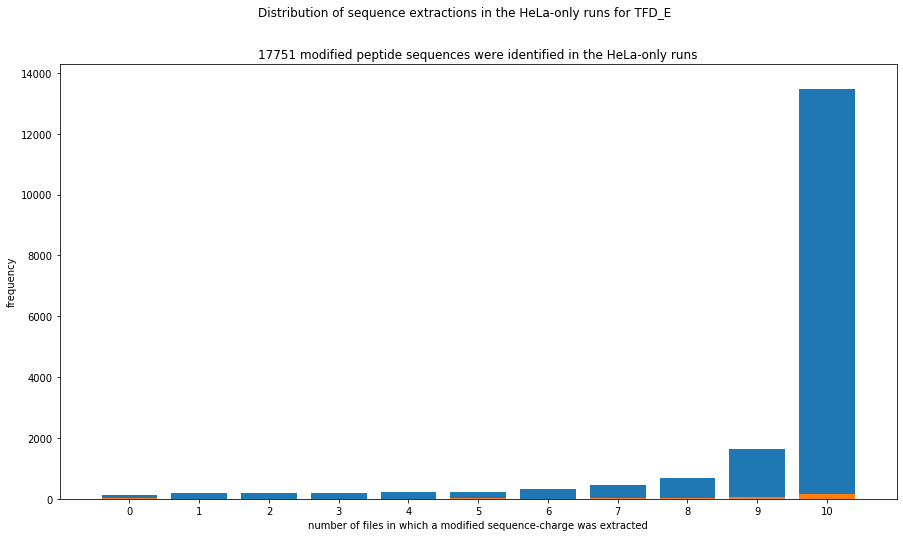

In [56]:
f, ax1 = plt.subplots()
f.set_figheight(8)
f.set_figwidth(15)

plt.margins(0.06)
plt.suptitle('Distribution of sequence extractions in the HeLa-only runs for TFD_E')
plt.title('{} modified peptide sequences were identified in the HeLa-only runs'.format(len(human_id_df)))

counts_human = np.bincount(human_id_df[human_id_df.human == True].ext_count_human_only_runs)
counts_other = np.bincount(human_id_df[human_id_df.human == False].ext_count_human_only_runs)

ax1.bar(range(11), counts_human, bottom=counts_other, width=0.8, align='center')
ax1.bar(range(11), counts_other, width=0.8, align='center')

plt.xlabel('number of files in which a modified sequence-charge was extracted')
plt.ylabel('frequency')
ax1.set(xticks=range(0,11), xlim=[-1, 11])
# plt.ylim((0,20000))

plt.show()

In [57]:
len(results_df[(results_df.id_count_human_only_runs > 0) & (results_df.ext_count_human_only_runs > 0)]) / len(results_df[(results_df.ext_count_human_only_runs > 0)])

0.6333405234397469

In [58]:
# missing values
(1.0 - (human_id_df.ext_count_human_only_runs.sum() / (len(human_id_df) * 10))) * 100

8.031096839614671

In [59]:
# false discovery rate
len(human_id_df[human_id_df.human == False]) / len(human_id_df) * 100

1.7238465438566841